# Are Kids in School Ready for High School and Beyond?

It can be hard tor a kid to know if they're ready for High School, it's a step forward from Middle School and a lot of kids struggle with the new concepts introduced to them. Standardized tests are one way of knowing if a kid is ready, the Specialized High School Admissions Test (SHSAT) is used in New York. PASSNYC, a non-profit organization in New York is trying to help understand what kids in what schools are in the most need of extra resources to help them feel more prepared for the future

Scores on the SHSAT:

- 1: Insufficient
- 2: Partial but insufficient
- 3: Sufficient
- 4: More than sufficient

This dataset only catalogs if a student has scored a 4, to be able to represent how many students are truly ready for the next grade.

[A link to the dataset](https://www.kaggle.com/passnyc/data-science-for-good#2016%20School%20Explorer.csv)

# Data Reading and Combinations

In [21]:
# wdata is a package I made for the sake of this project to make dealing with .csv data in Python a simpler
# process for myself by utilizing classes
from wdata import *
# SchoolData is a class that inherits from other classes that I made in wdata, the goal of it is to do all the cleaning
# in it's __init__() method and have methods specific to that dataset that I can call
from school_wdata import SchoolData
# from sklearn.ensemble import ExtraTreesRegressor
# from sklearn.preprocessing import StandardScaler
# from sklearn.impute import SimpleImputer

df = pd.read_csv('2016 School Explorer.csv')
# Load data into a SchoolData Class
data = SchoolData(df=df,figwidth=15,figheight=8)

        Zip  Grocery Store Count
0     10001                   23
1     10002                   50
2     10003                   29
3     10004                    6
4     10005                    3
5     10006                    2
6     10007                   10
7     10009                   15
8     10010                   19
9     10011                   28
10    10012                   20
11    10013                   35
12    10014                    8
13    10016                   22
14    10017                   13
15    10018                   33
16    10019                   23
17    10020                    4
18    10021                    7
19    10022                   24
20    10023                   11
21    10024                   10
22    10025                   26
23    10026                    7
24    10027                   20
25    10028                   16
26    10029                   25
27    10030                    6
28    10031                   17
29    1003

## Information

There is a lot of information in the dataset provided by PASSNYC.

- Information about a School's location
- Grades the School teaches
- Economic Need Index of School
- Estimate of School Income
- Ethnicity distribution at a school
- Metrics and whether or not the school is reaching their Targets
- Average Math / ELA proficiency of students
- Scores of students separated by Grades and Ethnicity
- And more

Given this information we can try to come up with some conclusions to help us figure out what Schools are in the most need.

## District

Let's look by School District and see which is struggling most with performance

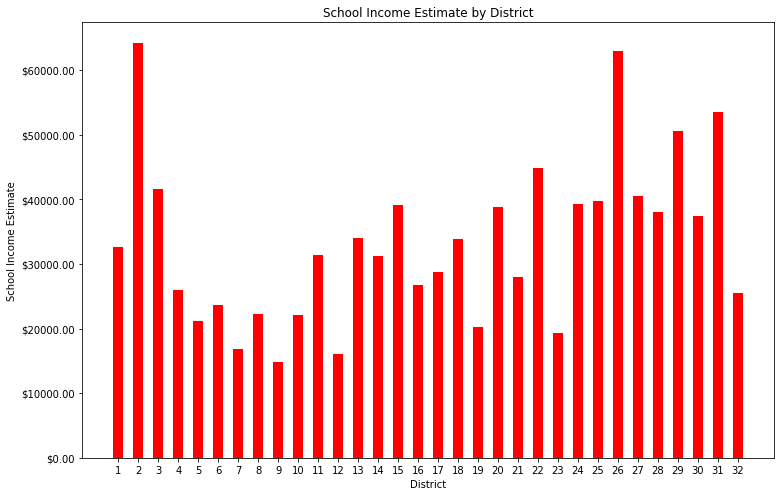

In [2]:
data.dis_bargraph('School Income Estimate', dollarticks_y=True)

We can already see a disparity between districts and the average School Income Estimate. Districts 7, 9, 12, 19, and 23 seem to be in the lower-brackets. Let's see if there's a relationship between that and the proportion of students in those districts who get 4s on the SHSAT

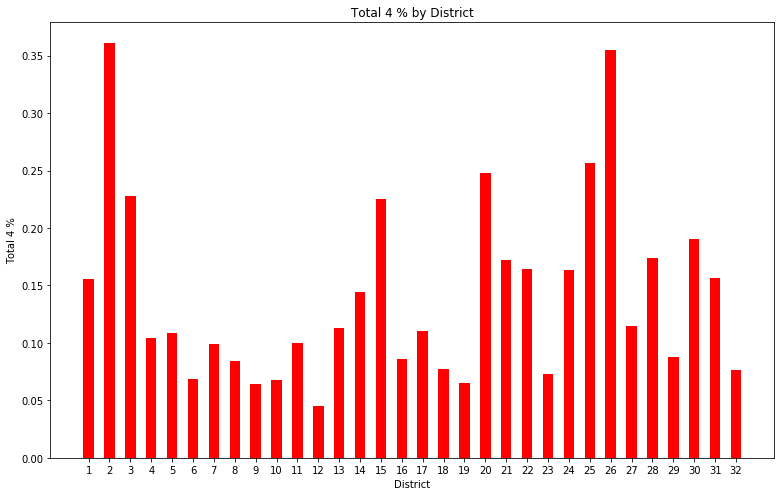

In [28]:
data.dis_bargraph('Total 4 %')

The two richest districts 2 and 26 also have the highest proportion of 4s, suggesting a correlation between the two variables. Districts 6, 9, 10, 12, 18, 19, and 23 have the lowest performance on the SHSAT.

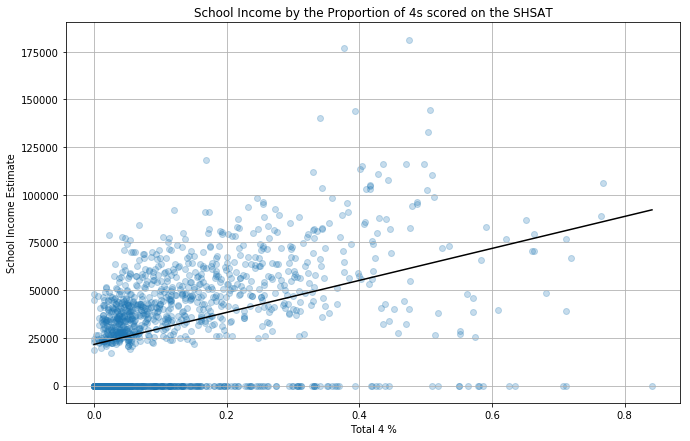

In [4]:
data.simple_scatter(['Total 4 %', 'School Income Estimate'],
    title = "School Income by the Proportion of 4s scored on the SHSAT", reg_line=True)

Looking at just those two variables, Total 4 % and School Income Estimate do seem to have a positive correlation

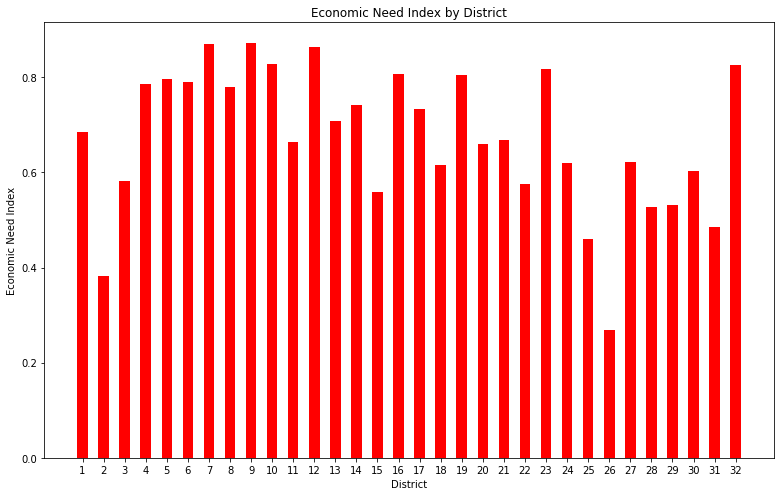

In [5]:
data.dis_bargraph('Economic Need Index')

The two riches School districts have the lowest Economic Need Index (ENI) and there is some overlap between districts with high ENI and low Total 4 % scores.

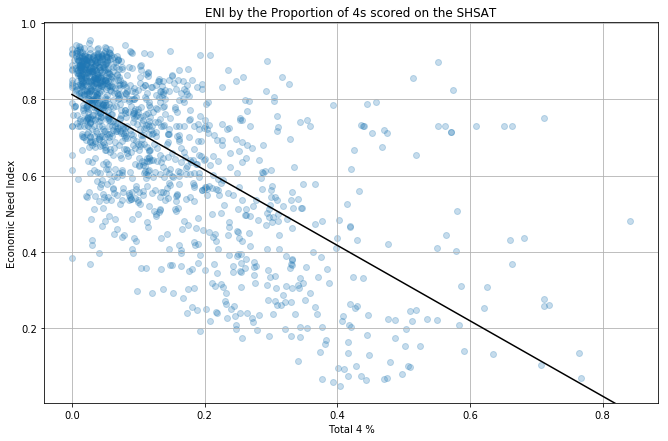

In [6]:
data.simple_scatter(['Total 4 %', 'Economic Need Index'],
    title = "ENI by the Proportion of 4s scored on the SHSAT", reg_line=True)

There is a **strong correlation** between the ENI of a school and  the proportion of 4s scored on an exam.

Using the above information I am going to filter the data to look for Schools in Need. Looking in districts 6, 7, 9, 12, 18, 19, and 23. Also looking for schools with an ENI greater than 0.75, where the majority of those low Total 4 % scores are clustered.

In [7]:
eni_in_need = data.df['Economic Need Index'] > 0.75
dis_in_need = [6, 7, 9, 12, 18, 19, 23]
dis_in_need = data.df['District'].isin( dis_in_need )

## Grades

Each School offers a different range of Grades. Most focus on 3rd to 8th grade as those children take the SHSAT, but the schools also range from Special Education to Prekindergarten to all the way to 12th grade

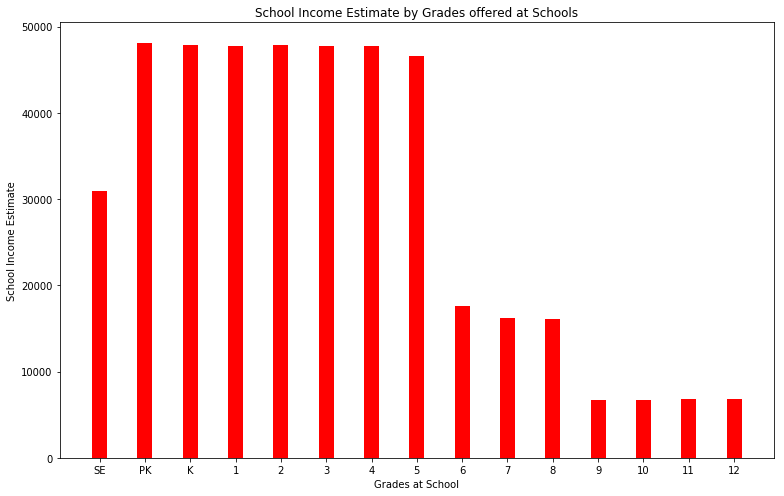

In [8]:
data.grades_bargraph('School Income Estimate', title = 'School Income Estimate by Grades offered at Schools')

There is a **stark dropoff in funds** for schools that offer 6th grade and onwards. Special Education also has less income than the Prekindergarten to 5th grade Schools.

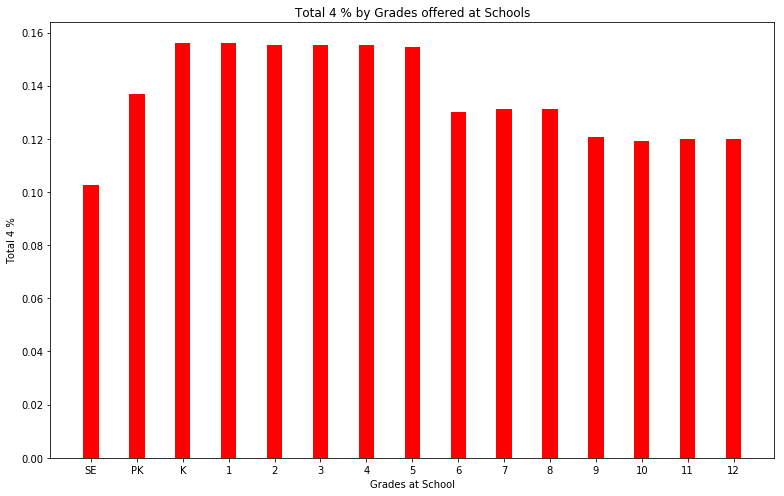

In [9]:
data.grades_bargraph('Total 4 %', title = 'Total 4 % by Grades offered at Schools')

Schools that offer Special Education and 6th to 12th grade have a dropoff in proportion of 4s scored on the SHSAT.

This information will be added to the filter for Schools in Need, looking at any schools that offers Speial Education or 6th grade and higher

In [10]:
grades_in_need = (data.df['SE'] == True) | (data.df['06'] == True) | (data.df['07'] == True) |\
(data.df['08'] == True) | (data.df['09'] == True) | (data.df['10'] == True) | (data.df['11'] == True) \
| (data.df['12'] == True)

Each of the test scores on the SHSAT has been sorted by grade, so we can look at how the proportion of 4s scored on the Test is changed by the grade taking it

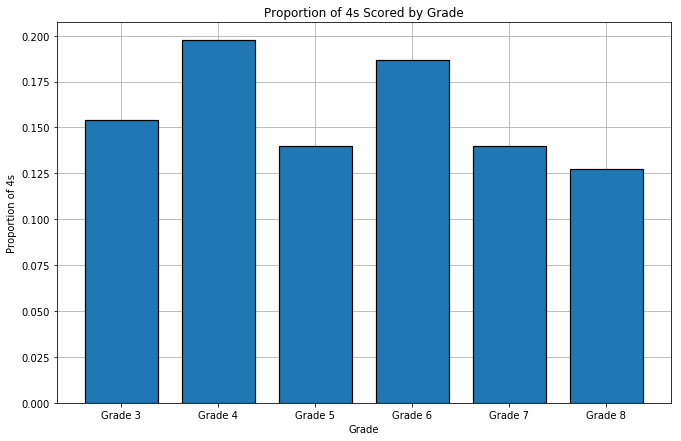

In [11]:
data.sum_col_barplot(partial_cols = ['Grade 3 4s Total', 'Grade 4 4s Total',
    'Grade 5 4s Total','Grade 6 4s Total','Grade 7 4s Total',
    'Grade 8 4s Total'], names = ['Grade 3', 'Grade 4', 'Grade 5', 'Grade 6',
    'Grade 7', 'Grade 8'], title = 'Proportion of 4s Scored by Grade',
    xlabel = 'Grade', ylabel = 'Proportion of 4s',
    pos_gap = 40,
    prop_plot=True,
    cols=['Grade 3 4s Tested Total', 'Grade 4 4s Tested Total',
        'Grade 5 4s Tested Total','Grade 6 4s Tested Total',
        'Grade 7 4s Tested Total','Grade 8 4s Tested Total'])

It looks like, in general, students have an easier time with some grades than others in terms of the content on the SHSAT for that grade

We can also look at the proportion of 4s scored by subject.

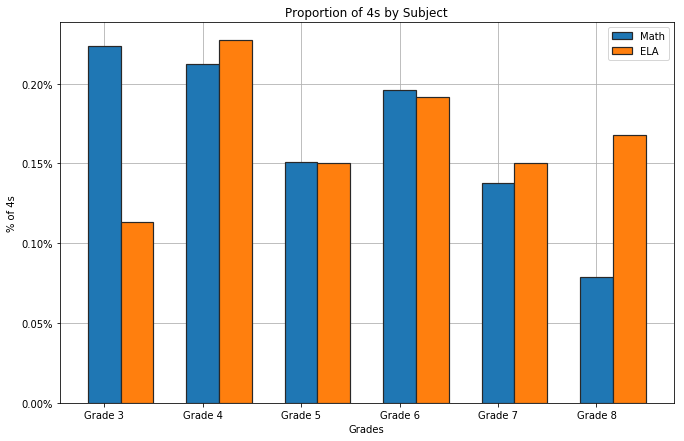

In [12]:
cols = data.column_generator(subject = 'both')
data.two_shared_barplot(barWidth = 1,
                        col_1 = [i for i in cols if 'Math' in i],
                        col_2 = [i for i in cols if 'ELA' in i],
                        label_1 = 'Math',
                        label_2 = 'ELA',
                        section_labels = ['Grade 3', 'Grade 4', 'Grade 5',
                            'Grade 6', 'Grade 7', 'Grade 8'],
                        title = 'Proportion of 4s by Subject',
                        xlabel = 'Grades',
                        ylabel = '% of 4s')

This gives us a better insight as to what subject students struggle with in what grade. The progression of Math scores and ELA scores seem to be inversely proportional, with students scoring worse on Math sections as it gets into more difficult subjects, but scoring better on ELA sections as their reading comprehension grows.

This indicates that students in lower grades need more ELA education and students in higher grades need more Math education.

## City

The City of each School is part of the dataset, let's explore which seem to be in the most need

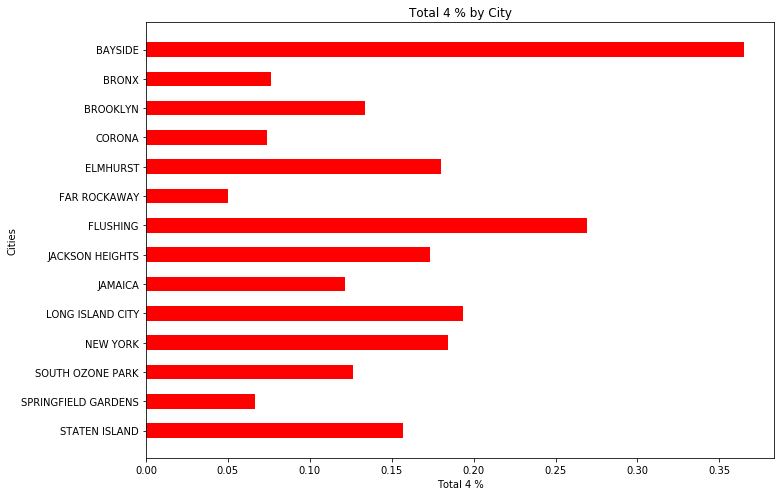

In [13]:
data.city_bargraph('Total 4 %')

Bayside seems to be score much higher than other cities by a significant margin. The Bronx, Corona, Far Rockaway and Springfield Gardens all seem to be struggling on the SHSAT

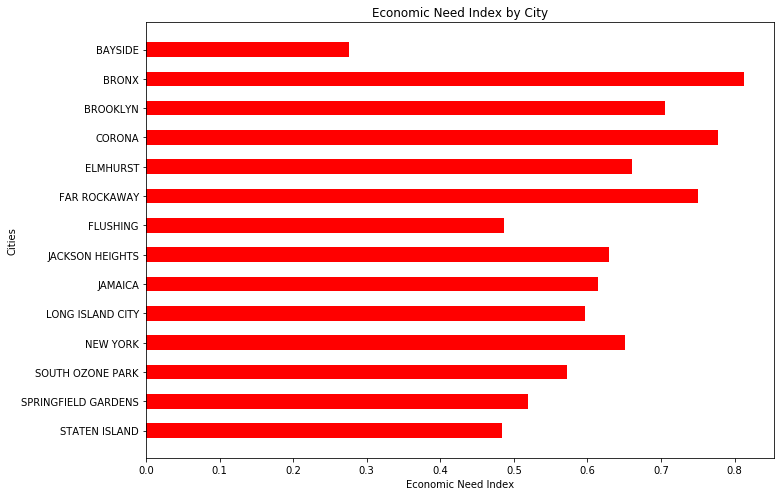

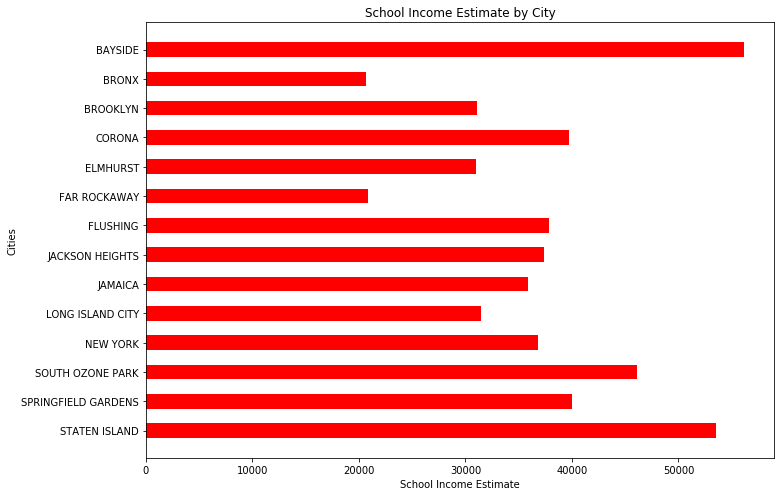

In [14]:
data.city_bargraph('Economic Need Index')
data.city_bargraph('School Income Estimate')

The budget and Economic Need Index of each City seem to be related to how well students score on the SHSAT. Schools with a higher ENI and lower School Income Estimate, such as The Bronx, Corona, and Far Rockaway all also had a low proportion of 4s on the SHSAT

City information will also be added to the Schools in Need filter, any schools in The Bronx, Coronoa, Far Rockaway or SPringfield Gardens.

In [15]:
cit_in_need = ['BRONX', 'CORONA', 'FAR ROCKAWAY', 'SPRINGFIELD GARDENS']
cit_in_need = data.df['City'].isin( cit_in_need )

In [16]:
data.need_df =  data.df[
#                         (grades_in_need) &
                        (dis_in_need) &
                        (cit_in_need) &
                        (eni_in_need)
    ]

In [17]:
len(data.need_df)

137

In [18]:
test = SchoolData(data.need_df, figwidth=15,figheight=8,subset= True)

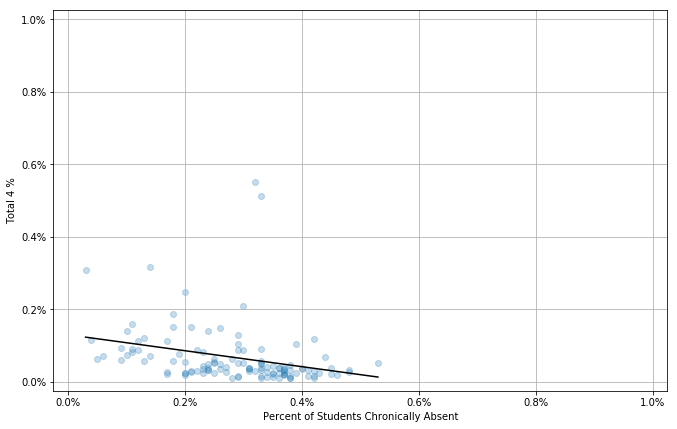

In [20]:
test.scatter_two_percs(['Percent of Students Chronically Absent', 'Total 4 %'], reg_line = True)

# Schools in Need

If we only look at schools with the above District, Grades, and Cities in need, we are down to the top 66 schools out of 1272 who seem to be in the most need. There are still some other metrics that we can use to see what schools are in need.

## Ethnicity

The school keeps tracks of the 4s scored on these exams and splits that data up by ethnicity. This means we can look at trends in Ethnicity based on those scores and other metrics.

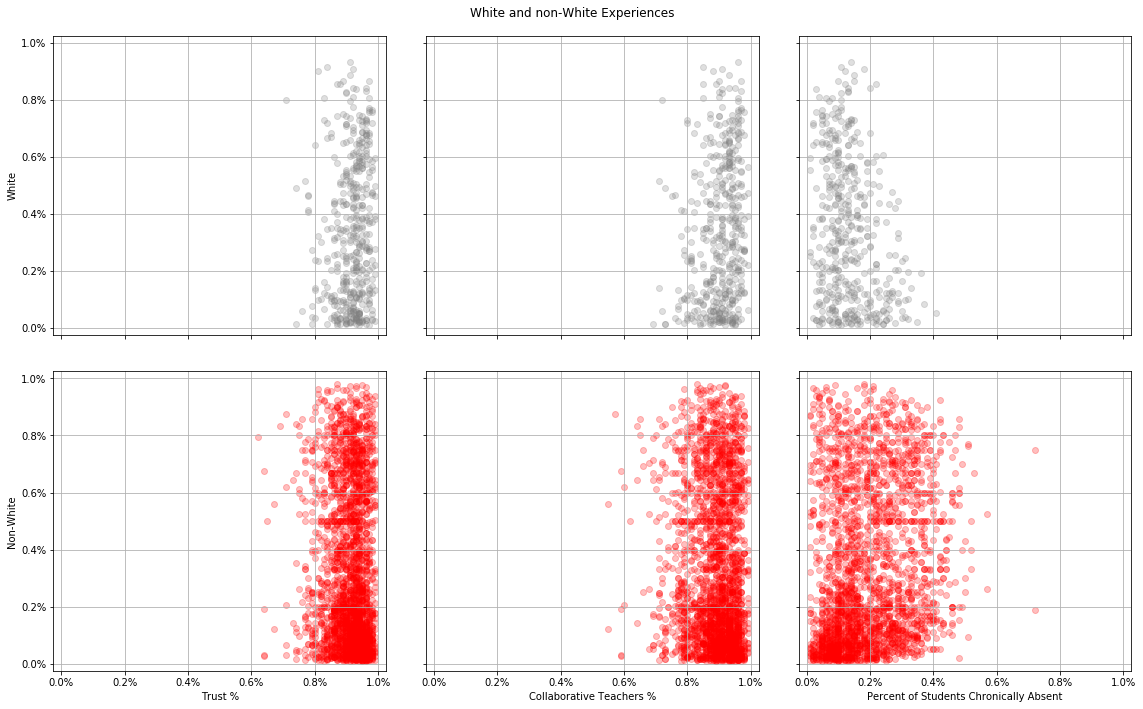

In [140]:
non_white = ['Black Students %', 'Asian / Pacific Islanders Students %',
    'Hispanic / Latino Students %', 'American Indian / Alaska Native Students %',
    'Multiracial Students %']

graph_dict = {
    0:{ 'cols': ['Trust %', 'White Students %'], 'c': 'grey'},
    3:{ 'cols': ['Trust %', non_white], 'c': 'red'},
    1:{ 'cols': ['Collaborative Teachers %', 'White Students %'], 'c': 'grey'},
    4:{ 'cols': ['Collaborative Teachers %', non_white],'c': 'red'},
    2:{ 'cols': ['Percent of Students Chronically Absent', 'White Students %'],
        'c': 'grey'},
    5:{ 'cols': ['Percent of Students Chronically Absent', non_white],'c': 'red'}
}

data.multiplot_multicol(graph_dict, 2, 3, title="White and non-White Experiences",
    x_labels=['','','','Trust %', 'Collaborative Teachers %',
        'Percent of Students Chronically Absent'
             ],
    y_labels=['White', 'Non-White'
#               'White','Non-White'
             ],
    figwidth=16,
    figheight=10,
    graph_fun=Graph.scatter_two_percs,sharey=False,pair_cols=True,
    top=0.94, wspace=0.12, hspace=0.12)

For non-white students, which includes Black, Asian / Pacific Islanders, Hispanic / Latino, American Indian / Alaska Native and Multiracial students, every single scholastic metric is worse for them. There is less trust at schools, teachers are less collaborative, and students are more likely to be chronically absent

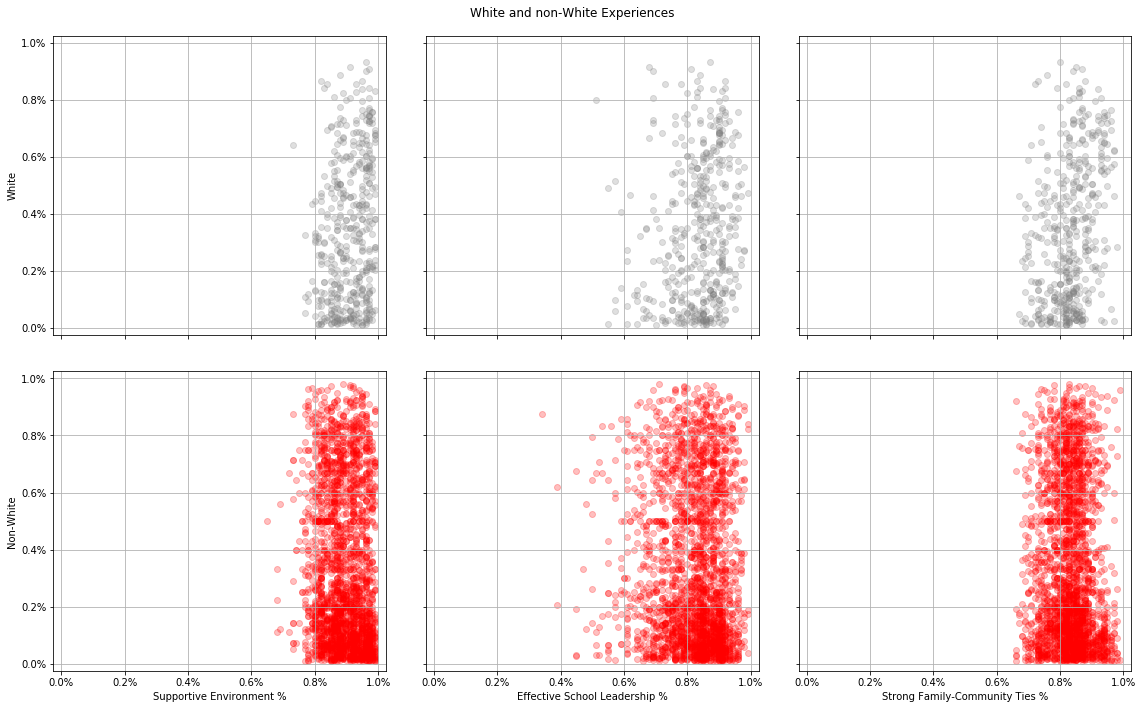

In [141]:
graph_dict = {
    0:{ 'cols': ['Supportive Environment %', 'White Students %'], 'c': 'grey'},
    3:{ 'cols': ['Supportive Environment %', non_white], 'c': 'red'},
    1:{ 'cols': ['Effective School Leadership %', 'White Students %'], 'c': 'grey'},
    4:{ 'cols': ['Effective School Leadership %', non_white],'c': 'red'},
    2:{ 'cols': ['Strong Family-Community Ties %', 'White Students %'],
        'c': 'grey'},
    5:{ 'cols': ['Strong Family-Community Ties %', non_white],'c': 'red'}
}

data.multiplot_multicol(graph_dict, 2, 3, title="White and non-White Experiences",
    x_labels=['','','',
        'Supportive Environment %','Effective School Leadership %',
        'Strong Family-Community Ties %'],
    y_labels=['White', 'Non-White'],
    figwidth=16,
    figheight=10,
    graph_fun=Graph.scatter_two_percs,sharey=False,pair_cols=True,
    top=0.94, wspace=0.12, hspace=0.12)

Non-white students also have a less supportive environment and less effective school leadership. The Strong Family-Communitiy Ties seem to be pretty comparable

For the 66 Schools in Need, the highest Percentage of White Students is 3%, so the above correlation is already reflected within the filtered data

## Targets

We just looked at the different Scholastic Ratings as how they pertain to ethnicity, but they are also broken down into categories:

- Exceeding Target
- Meeting Target
- Approaching Target
- Not Meeting Target

We can also compare how each of those relate to other measurements within the dataset.

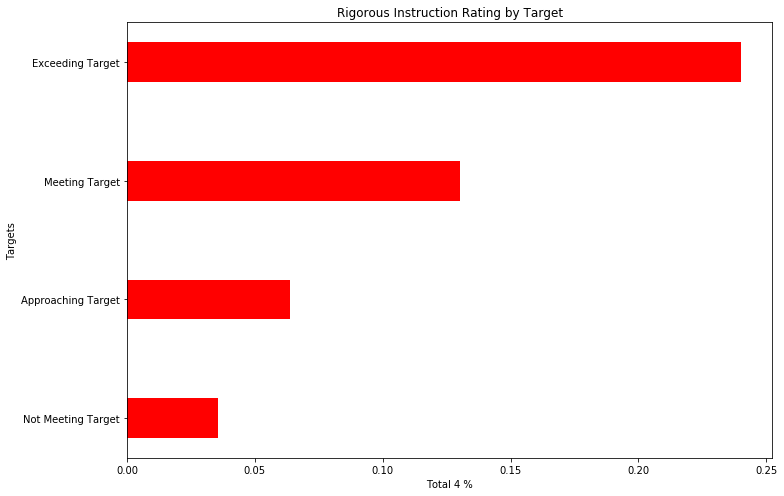

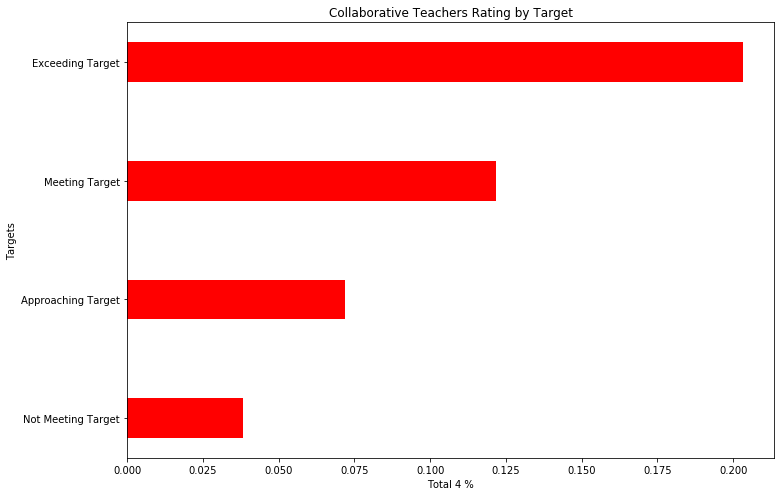

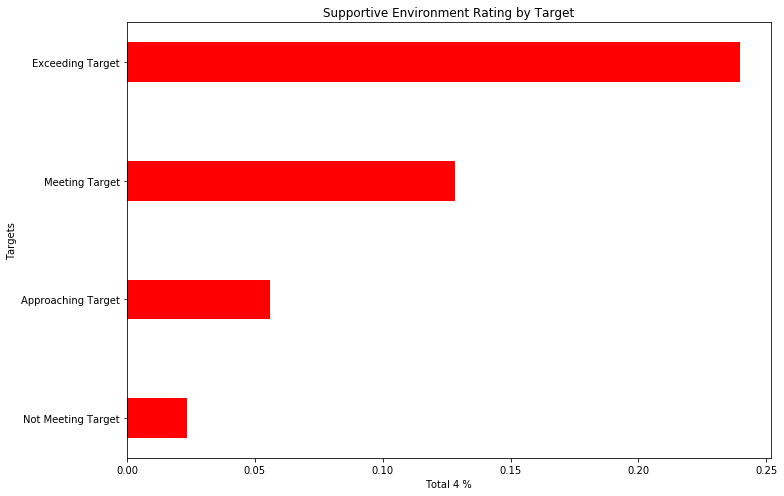

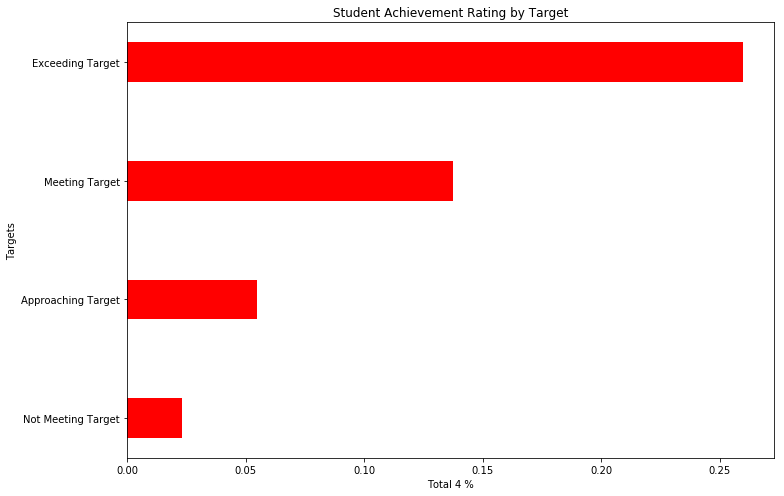

In [142]:
ratings = [
#     'Trust Rating',
           'Rigorous Instruction Rating',
                'Collaborative Teachers Rating',
                'Supportive Environment Rating',
#                 'Effective School Leadership Rating',
#                 'Strong Family-Community Ties Rating',
                'Student Achievement Rating'
                ]

for rating in ratings:
    data.rating_barplot(rating, 'Total 4 %')

For the four Ratings above, Collaborative Teachers, Student Achievement, Supportive Environment, and Rigorous Instruction, all have a strong impact on the % of 4s scored by students. 

I futher filtered the Schools in Need, looking for schools that are not 'Exceeding Target' in any of these four Ratings and took the number of possible schools to support from 66 to 44 potential schools to help, that is 3.4% of the total schools in the dataset as defined as Schools in Need.

In [143]:
colab_ratings = data.need_df['Collaborative Teachers Rating'] != 'Exceeding Target'
achieve_ratings = data.need_df['Student Achievement Rating'] != 'Exceeding Target'
env_ratings = data.need_df['Supportive Environment Rating'] != 'Exceeding Target'
inst_ratings = data.need_df['Rigorous Instruction Rating'] != 'Exceeding Target'
eff_ratings = data.need_df['Effective School Leadership Rating'] != 'Exceeding Target'
fam_ratings = data.need_df['Strong Family-Community Ties Rating'] != 'Exceeding Target'


data.need_df = data.need_df[((colab_ratings) & (achieve_ratings) & (env_ratings) & (inst_ratings)
                            & (eff_ratings) & (fam_ratings))]

## Chronically Absent Students

In [144]:
absent_need = data.need_df['Percent of Students Chronically Absent'] > 0.20
data.need_df = data.need_df[absent_need]

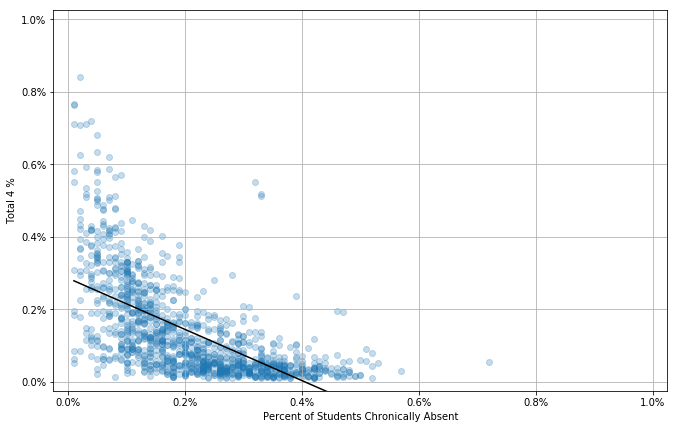

In [111]:
data.scatter_two_percs(['Percent of Students Chronically Absent', 'Total 4 %'], reg_line = True)

In [162]:
len(data.need_df)

20

In [161]:
english_need = data.need_df['Limited English Students %'] > 0.0
data.need_df = data.need_df[english_need]

In [22]:
data.df.describe()

,District,Latitude,Longitude,Zip,Community School?,Economic Need Index,School Income Estimate,Percent ELL,Percent Asian,Percent Black,Percent Hispanic,Percent Black / Hispanic,Percent White,Student Attendance Rate,Percent of Students Chronically Absent,Rigorous Instruction %,Collaborative Teachers %,Supportive Environment %,Effective School Leadership %,Strong Family-Community Ties %,Trust %,Average ELA Proficiency,Average Math Proficiency,Grade 3 ELA - All Students Tested,Grade 3 ELA 4s - All Students,Grade 3 Math - All Students Tested,Grade 3 Math 4s - All Students,Grade 4 ELA - All Students Tested,Grade 4 ELA 4s - All Students,Grade 4 Math - All Students Tested,Grade 4 Math 4s - All Students,Grade 5 ELA - All Students Tested,Grade 5 ELA 4s - All Students,Grade 5 Math - All Students Tested,Grade 5 Math 4s - All Students,Grade 6 ELA - All Students Tested,Grade 6 ELA 4s - All Students,Grade 6 Math - All Students Tested,Grade 6 Math 4s - All Students,Grade 7 ELA - All Students Tested,Grade 7 ELA 4s - All Students,Grade 7 Math - All Students Tested,Grade 7 Math 4s - All Students,Grade 8 ELA - All Students Tested,Grade 8 ELA 4s - All Students,Grade 8 Math - All Students Tested,Grade 8 Math 4s - All Students,Grocery Store Count,Closest Metro Station,Car Crash Count,Students Tested Total,Student Tested 4s,Math Tested Total,Math Tested 4s,ELA Tested Total,ELA Tested 4s,White Students Total,Asian / Pacific Islanders Students Total,Black Students Total,Hispanic / Latino Students Total,American Indian / Alaska Native Students Total,Multiracial Students Total,Limited English Students Total,Economically Disadvantaged Students Total,4 Tested Total,Ethnicity Tested Total,Nonreported Ethnicity Total,Nonreported Ethnicity %,Total 4 %,Math Prop 4,ELA Prop 4,White Students %,Asian / Pacific Islanders Students %,Black Students %,Hispanic / Latino Students %,American Indian / Alaska Native Students %,Multiracial Students %,Limited English Students %,Economically Disadvantaged Students %,Grade 3 4s Total,Grade 3 4s Tested Total,Grade 4 4s Total,Grade 4 4s Tested Total,Grade 5 4s Total,Grade 5 4s Tested Total,Grade 6 4s Total,Grade 6 4s Tested Total,Grade 7 4s Total,Grade 7 4s Tested Total,Grade 8 4s Total,Grade 8 4s Tested Total
count,1272.00000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1271.000000,1269.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000
mean,16.13522,40.734537,-73.918347,10815.720912,0.059748,0.673435,33361.777170,0.124843,0.116478,0.319961,0.411533,0.731439,0.131635,0.909025,0.211509,0.877186,0.866981,0.870039,0.800110,0.814583,0.886454,2.530574,2.665110,60.569182,4.952830,61.651730,13.878145,58.007862,9.904088,59.003931,13.192610,56.336478,6.540881,57.263365,9.362421,54.546384,8.353774,55.455975,12.169025,53.658805,6.540881,54.286950,8.559748,52.162736,7.322327,43.841195,4.911950,20.656447,17.780547,7483.278172,666.784591,105.688679,331.503145,62.073899,335.281447,43.614780,26.429245,33.484277,13.245283,20.123428,0.243711,0.501572,1.760220,52.723270,105.688679,94.027516,11.661

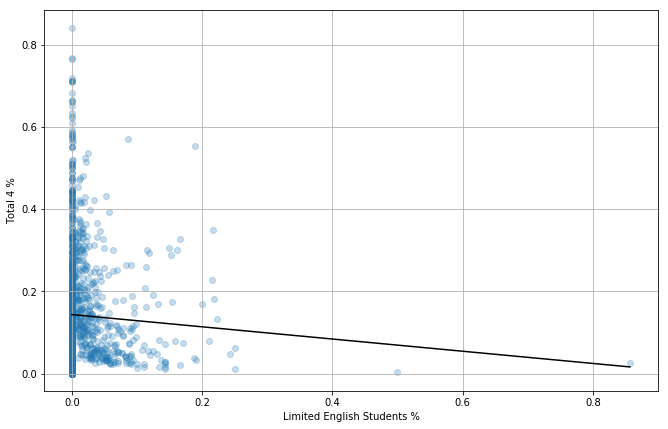

In [160]:
data.simple_scatter(['Limited English Students %', 'Total 4 %'], reg_line=True)

# Other Data About New York

Based on the open datasets provided by Kaggle about New York there were hundreds of datasets to choose from to see if there would be any correlation between the brought in data and the original data

## Grocery Stores

I wanted to see if any area in New York would correspond to a **food desert** so I found a dataset that contained a list of grocery stores within new york and counted the number of Grocery Stores available within that zip code. [This is the list of Grocery Stores in NYC](https://data.ny.gov/Economic-Development/Retail-Food-Stores/9a8c-vfzj)

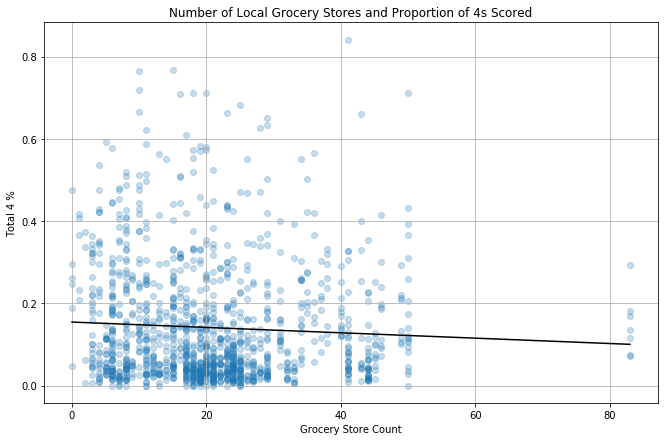

In [98]:
data.simple_scatter(['Grocery Store Count', 'Total 4 %'], reg_line=True,
                   title = 'Number of Local Grocery Stores and Proportion of 4s Scored')

There was no correlation between the number of local grocery stores and the scores on the SHSAT.

## Public Transit

I was also curious about how the availability of public transit and if it affected scores on the SHSAT. [This is a list of Metro stations in NYC.](https://data.ny.gov/widgets/i9wp-a4ja). I took the co-ordinates for all the entrances to the stations and computed the shortest distance between a school and a station measured in miles.

This is a Euclidean Distance between a given school and the closest Metro station, so it's meant to be more of a measurement of how close to public transit the school is and not a measurement of travel distance

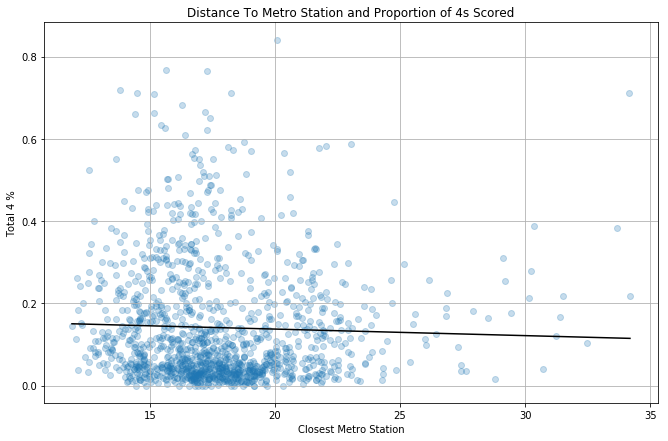

In [99]:
data.simple_scatter(['Closest Metro Station', 'Total 4 %'], reg_line=True,
                   title = 'Distance To Metro Station and Proportion of 4s Scored')

Again, there was no correlation between the distance to the closest metro station and scoring on the SHSAT

## Car Safety

[This is a dataset about car crashes in NYC.](https://www.kaggle.com/new-york-city/nypd-motor-vehicle-collisions) I used this dataset as a measurement of how **safe** the roads are in NYC near these schools. Zip Codes were only tracked in this dataset if someone was injured in the car crash, meaning that these are only what can be considered moderate to severe car accidents.

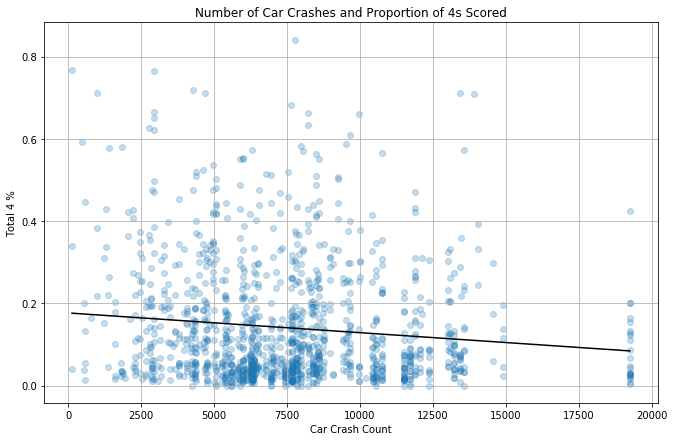

In [100]:
data.simple_scatter(['Car Crash Count', 'Total 4 %'], reg_line=True,
                   title = 'Number of Car Crashes and Proportion of 4s Scored')

And again, there doesn't seem to be a correlation between Car Safety in areas around the Schools and scores on the SHSAT

# Schools in Need

Looking at the schools in need, let's generalize some information about them

In [41]:
data.df.head()

,School Name,District,Latitude,Longitude,City,Zip,Grades,Grade Low,Grade High,Community School?,Economic Need Index,School Income Estimate,Percent ELL,Percent Asian,Percent Black,Percent Hispanic,Percent Black / Hispanic,Percent White,Student Attendance Rate,Percent of Students Chronically Absent,Rigorous Instruction %,Rigorous Instruction Rating,Collaborative Teachers %,Collaborative Teachers Rating,Supportive Environment %,Supportive Environment Rating,Effective School Leadership %,Effective School Leadership Rating,Strong Family-Community Ties %,Strong Family-Community Ties Rating,Trust %,Trust Rating,Student Achievement Rating,Average ELA Proficiency,Average Math Proficiency,Grade 3 ELA - All Students Tested,Grade 3 ELA 4s - All Students,Grade 3 Math - All Students Tested,Grade 3 Math 4s - All Students,Grade 4 ELA - All Students Tested,Grade 4 ELA 4s - All Students,Grade 4 Math - All Students Tested,Grade 4 Math 4s - All Students,Grade 5 ELA - All Students Tested,Grade 5 ELA 4s - All Students,Grade 5 Math - All Students Tested,Grade 5 Math 4s - All Students,Grade 6 ELA - All Students Tested,Grade 6 ELA 4s - All Students,Grade 6 Math - All Students Tested,Grade 6 Math 4s - All Students,Grade 7 ELA - All Students Tested,Grade 7 ELA 4s - All Students,Grade 7 Math - All Students Tested,Grade 7 Math 4s - All Students,Grade 8 ELA - All Students Tested,Grade 8 ELA 4s - All Students,Grade 8 Math - All Students Tested,Grade 8 Math 4s - All Students,Grocery Store Count,Closest Metro Station,Car Crash Count,Students Tested Total,Student Tested 4s,Math Tested Total,Math Tested 4s,ELA Tested Total,ELA Tested 4s,White Students Total,Asian / Pacific Islanders Students Total,Black Students Total,Hispanic / Latino Students Total,American Indian / Alaska Native Students Total,Multiracial Students Total,Limited English Students Total,Economically Disadvantaged Students Total,4 Tested Total,Ethnicity Tested Total,Nonreported Ethnicity Total,Nonreported Ethnicity %,Total 4 %,Math Prop 4,ELA Prop 4,White Students %,Asian / Pacific Islanders Students %,Black Students %,Hispanic / Latino Students %,American Indian / Alaska Native Students %,Multiracial Students %,Limited English Students %,Economically Disadvantaged Students %,Income Bin,ENI Bin,Total % Bin,Grade 3 4s Total,Grade 3 4s Tested Total,Grade 4 4s Total,Grade 4 4s Tested Total,Grade 5 4s Total,Grade 5 4s Tested Total,Grade 6 4s Total,Grade 6 4s Tested Total,Grade 7 4s Total,Grade 7 4s Tested Total,Grade 8 4s Total,Grade 8 4s Tested Total,01,K,05,09,08,03,PK,0K,02,04,10,SE,07,06,12,11
0,P.S. 015 ROBERTO CLEMENTE,1,40.721834,-73.978766,NEW YORK,10009,"PK,0K,01,02,03,04,05",PK,05,1,0.919,31141.72,0.09,0.05,0.32,0.60,0.92,0.01,0.94,0.18,0.89,Meeting Target,0.94,Meeting Target,0.86,Exceeding Target,0.91,Exceeding Target,0.85,Meeting Target,0.94,Exceeding Target,Approaching Target,2.14,2.17,20,0,21,0,15,0,15,2,16,0,16,0,0,0,0,0,0,0,0,0,0,0,0,0,15,14.832886,8221.0,103,2,52,2,51,0,0,0,0,0,0,0,0,0,2,0,2,1.000000,0.019417,0.038462,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,low,high,low,0,41,2,30,0,32,0,0,0,0,0,0,True,True,True,False,False,True,True,True,True,True,False,False,False,False,False,False
1,P.S. 019 ASHER LEVY,1,40.729892,-73.984231,NEW YORK,10003,"PK,0K,01,02,03,04,05",PK,05,0,0.641,56462.88,0.05,0.10,0.20,0.63,0.83,0.06,0.92,0.30,0.96,Meeting Target,0.96,Meeting Target,0.97,Meeting Target,0.90,Exceeding Target,0.86,Meeting Target,0.94,Meeting Target,Exceeding Target,2.63,2.98,33,2,33,6,29,5,28,10,32,7,32,4,0,0,0,0,0,0,0,0,0,0,0,0,29,14.584245,11873.0,187,34,93,20,94,14,0,4,6,13,0,0,0,24,34,23,11,0.323529,0.181818,0.215054,0.148936,0.000000,0.117647,0.176471,0.382353,0.0,0.0,0.000000,0.705882,medium,medium,low,8,66,15,57,11,64,0,0,0,0,0,0,True,True,True,False,False,True,True,True,True,True,False,False,False,False,False,False
2,P.S. 020 ANNA SILVER,1,40.721274,-73.986315,NEW YORK,10002,"PK,0K,01,02,03,04,05",PK,05,0,0.744,44342.61,0.15,0.35,0.08,0.49,0.57,0.

In [26]:
sorted(data.df['Economic Need Index'])

[0.049,
 0.059000000000000004,
 0.064,
 0.065,
 0.066,
 0.068,
 0.069,
 0.07400000000000001,
 0.075,
 0.078,
 0.092,
 0.094,
 0.09699999999999999,
 0.099,
 0.10099999999999999,
 0.10400000000000001,
 0.11,
 0.114,
 0.13,
 0.131,
 0.134,
 0.135,
 0.13699999999999998,
 0.139,
 0.153,
 0.154,
 0.158,
 0.162,
 0.168,
 0.17300000000000001,
 0.174,
 0.17600000000000002,
 0.179,
 0.18,
 0.18100000000000002,
 0.191,
 0.19399999999999998,
 0.196,
 0.198,
 0.198,
 0.2,
 0.20199999999999999,
 0.203,
 0.203,
 0.207,
 0.209,
 0.209,
 0.215,
 0.217,
 0.21899999999999997,
 0.21899999999999997,
 0.221,
 0.221,
 0.22399999999999998,
 0.22399999999999998,
 0.225,
 0.22699999999999998,
 0.23199999999999998,
 0.23199999999999998,
 0.233,
 0.23399999999999999,
 0.23600000000000002,
 0.23600000000000002,
 0.237,
 0.239,
 0.239,
 0.239,
 0.24,
 0.243,
 0.244,
 0.247,
 0.248,
 0.249,
 0.25,
 0.252,
 0.253,
 0.254,
 0.255,
 0.257,
 0.258,
 0.258,
 0.259,
 0.261,
 0.261,
 0.262,
 0.263,
 0.267,
 0.2689999999999